[20220814]

# 1. Exploration

This is timeseries exploration

*Base Level + Trend + Seasonality + Error*

## Goal
Find patterns on timeseries

source : https://www.machinelearningplus.com/time-series/time-series-analysis-python/, https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Basic Summary
        [ ] Data Preparations / Feature Engineering
            [ ] Missing Value
            [ ] Outliers Handling
            [ ] Categorical Handling
        [ ] Timeseries obervation
            [ ] Autocorrelation
            [ ] Trend
            [ ] Seasonality
            [ ] Stationarity (Dickey Fuller)
        


In [25]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import myfunc 
from ramal import jampi

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [3]:
df = pd.read_csv(PATH_INTERIM + 'daily-min-temp2_iter0.csv')

In [4]:
df.head()

,Date,Temp,is_future
0,1981-01-01,20.7,False
1,1981-01-02,17.9,False
2,1981-01-03,18.8,False
3,1981-01-04,14.6,False
4,1981-01-05,15.8,False


## Data Prep

In [5]:
ts = jampi(data = df, time_col = 'Date', data_col = 'Temp', start_test = '1990-01-01')

null data has been found


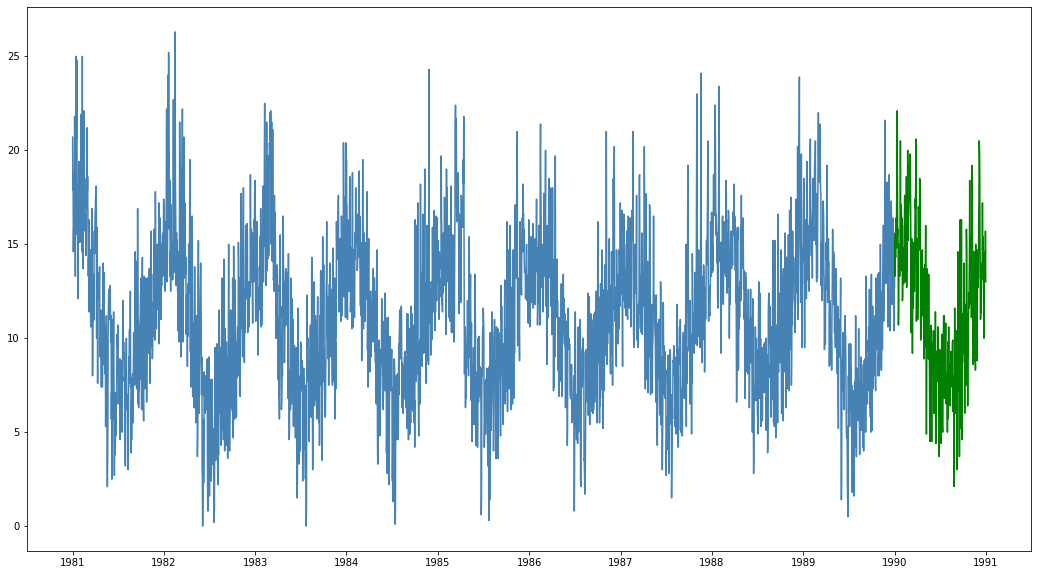

In [6]:
# ts.plot()
ts.plot(test = True)

In [7]:
# ts.data.loc['1984-12-28':'1985-01-01']
# ts.data.asfreq('d').interpolate().loc['1984-12-28':'1985-01-01']

## handling null
ts.interpolate()

## decompose
ts.decompose()

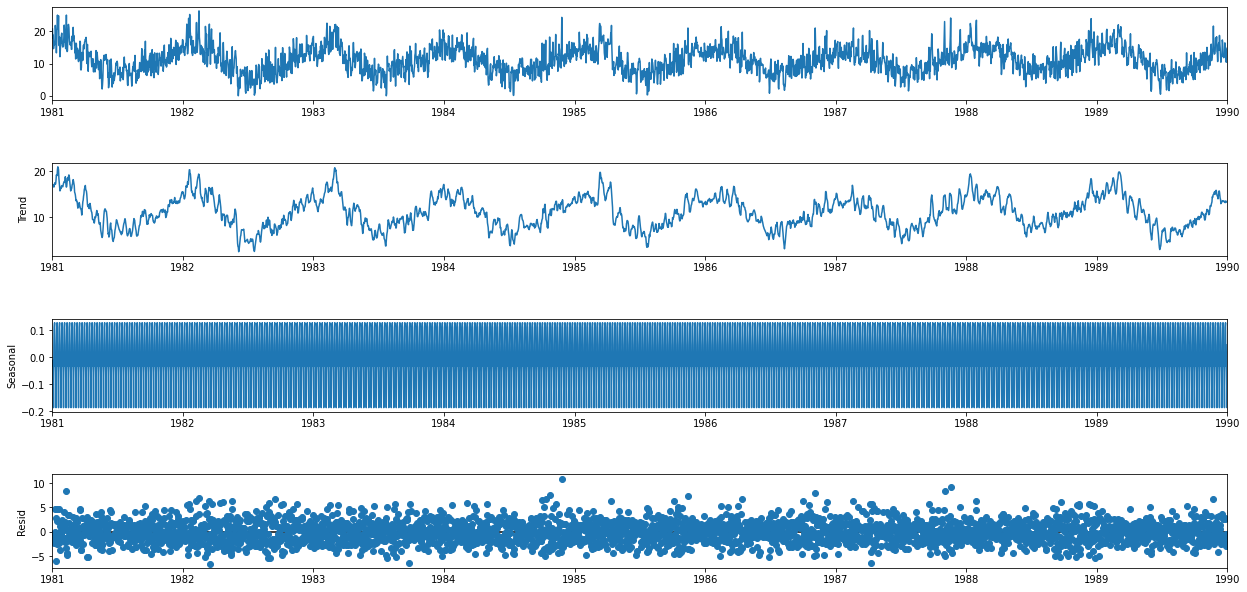

In [8]:
fig = ts.decomp.plot()
fig.set_size_inches((20, 9))

In [9]:
## just look into last one year (because there is a seasonal still in trend)
df2 = df[df.Date>='1989-01-01']
ts2 = jampi(data = df2, time_col = 'Date', data_col = 'Temp', start_test = '1990-01-01')
## decompose
ts2.decompose()

../../src/ramal.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[time_col] = pd.to_datetime(data[time_col])


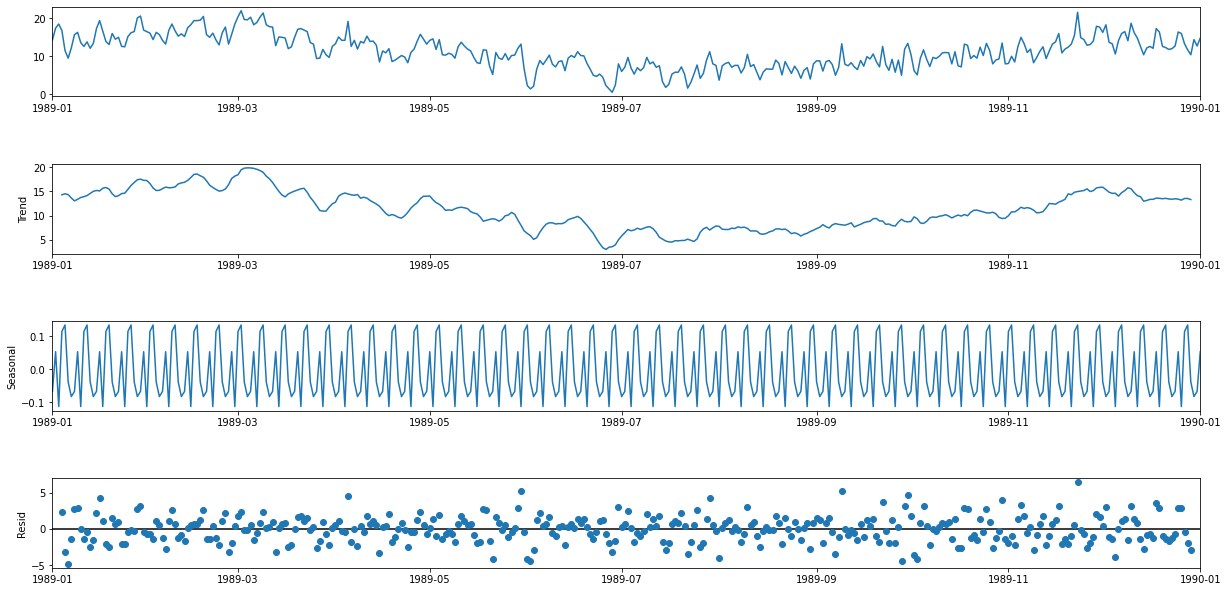

In [10]:
fig = ts2.decomp.plot()
fig.set_size_inches((20, 9))

In [11]:
ts2.adf_test()

ADF Statistic: -1.2705643553464192
p-value: 0.6425292894503066
Not Stationary


In [20]:
## not stationary
## check its differencing,
ts2.adf_test(differencing = 1)

ADF Statistic: -6.224267637840539
p-value: 5.134005969830711e-08
Stationary


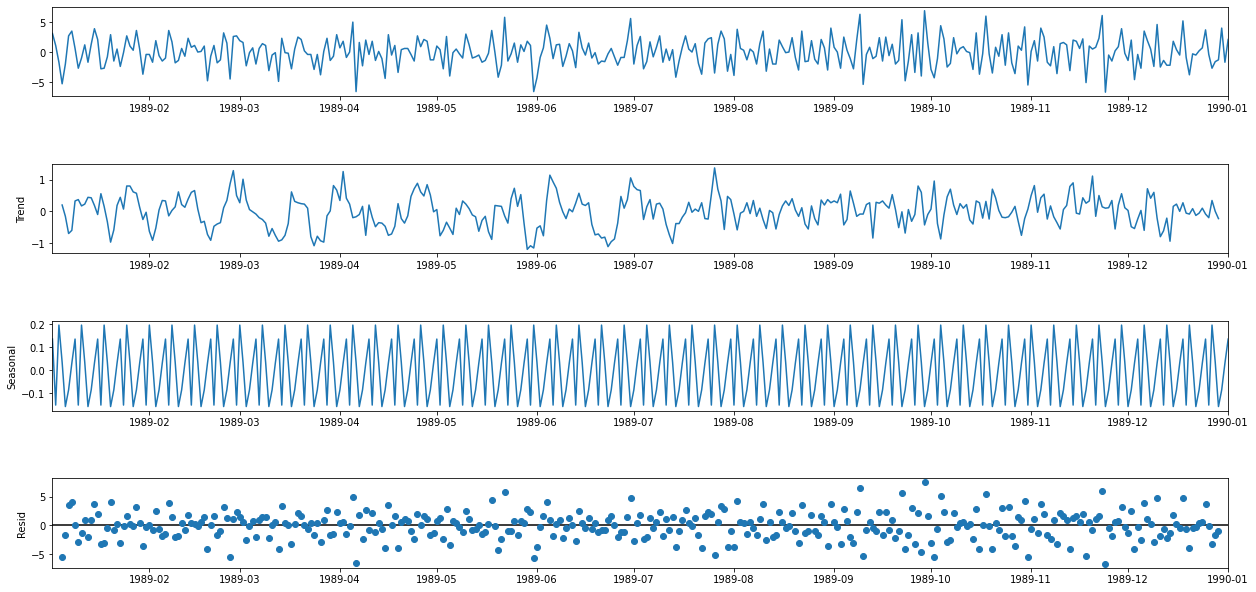

In [21]:
ts2.decompose(differencing = 1)
fig = ts2.decomp.plot()
fig.set_size_inches((20, 9))

In [35]:
# acf_val, ci = acf(ts2.data, alpha=0.05,nlags = 5)
# for x,y in zip(acf_val, ci):
#     print(x-y)

In [36]:
# fig, axes = plt.subplots(2,1,figsize=(12,8))
# plot_acf(ts2.data, lags=5, ax=axes[0])
# plot_pacf(ts2.data, lags=5, ax=axes[1])

In [37]:
# ts.data.to_csv(PATH_INTERIM+'daily-min-temp3_iter0.csv')